In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
results=pd.read_csv('C:\\Users\\bhuva\\OneDrive\\Desktop\\Python_P\\Datasets\\F1 Analytics\\results.csv')

In [4]:
races=pd.read_csv('C:\\Users\\bhuva\\OneDrive\\Desktop\\Python_P\\Datasets\\F1 Analytics\\races.csv')
drivers=pd.read_csv('C:\\Users\\bhuva\\OneDrive\\Desktop\\Python_P\\Datasets\\F1 Analytics\\drivers.csv')
constructors=pd.read_csv('C:\\Users\\bhuva\\OneDrive\\Desktop\\Python_P\\Datasets\\F1 Analytics\\constructors.csv')

In [5]:
df=pd.merge(results,races[['raceId','year','name','round']],on='raceId',how='left')

In [6]:
df=pd.merge(df,drivers[['driverId','driverRef','nationality']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','constructorRef','name','nationality']],on='constructorId',how='left')

In [7]:
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,constructorRef,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,2008,Australian Grand Prix,1,hamilton,British,mclaren,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,bmw_sauber,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,2008,Australian Grand Prix,1,rosberg,German,williams,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,renault,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,mclaren,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,211.632,11,2022,Abu Dhabi Grand Prix,22,mick_schumacher,German,haas,Haas F1 Team,American
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,208.556,11,2022,Abu Dhabi Grand Prix,22,kevin_magnussen,Danish,haas,Haas F1 Team,American
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,211.738,6,2022,Abu Dhabi Grand Prix,22,hamilton,British,mercedes,Mercedes,German
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,210.517,130,2022,Abu Dhabi Grand Prix,22,latifi,Canadian,williams,Williams,British


In [8]:
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)

In [9]:
df.rename(columns={'rank':'fastestLapRank','name_x':'gpName','nationality_x':'driverNationality','name_y':'constructorName','nationality_y':'constructorNationality','driverRef':'driver'},inplace=True)

In [10]:
df

,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gpName,round,driver,driverNationality,constructorRef,constructorName,constructorNationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,mclaren,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,bmw_sauber,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,williams,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,renault,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,mclaren,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,12,16,0.0,\N,\N,12,1:29.833,211.632,2022,Abu Dhabi Grand Prix,22,mick_schumacher,German,haas,Haas F1 Team,American
25836,16,17,0.0,\N,\N,20,1:31.158,208.556,2022,Abu Dhabi Grand Prix,22,kevin_magnussen,Danish,haas,Haas F1 Team,American
25837,5,18,0.0,\N,\N,11,1:29.788,211.738,2022,Abu Dhabi Grand Prix,22,hamilton,British,mercedes,Mercedes,German
25838,20,19,0.0,\N,\N,14,1:30.309,210.517,2022,Abu Dhabi Grand Prix,22,latifi,Canadian,williams,Williams,British


In [11]:
df=df[['year','gpName','round','driver','constructorName','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','driverNationality','constructorNationality']]

In [12]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,2022,Abu Dhabi Grand Prix,22,mick_schumacher,Haas F1 Team,12,16,0.0,\N,\N,12,1:29.833,211.632,German,American
25836,2022,Abu Dhabi Grand Prix,22,kevin_magnussen,Haas F1 Team,16,17,0.0,\N,\N,20,1:31.158,208.556,Danish,American
25837,2022,Abu Dhabi Grand Prix,22,hamilton,Mercedes,5,18,0.0,\N,\N,11,1:29.788,211.738,British,German
25838,2022,Abu Dhabi Grand Prix,22,latifi,Williams,20,19,0.0,\N,\N,14,1:30.309,210.517,Canadian,British


In [13]:
 df=df[df['year']!=2019]

In [14]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,2022,Abu Dhabi Grand Prix,22,mick_schumacher,Haas F1 Team,12,16,0.0,\N,\N,12,1:29.833,211.632,German,American
25836,2022,Abu Dhabi Grand Prix,22,kevin_magnussen,Haas F1 Team,16,17,0.0,\N,\N,20,1:31.158,208.556,Danish,American
25837,2022,Abu Dhabi Grand Prix,22,hamilton,Mercedes,5,18,0.0,\N,\N,11,1:29.788,211.738,British,German
25838,2022,Abu Dhabi Grand Prix,22,latifi,Williams,20,19,0.0,\N,\N,14,1:30.309,210.517,Canadian,British


In [15]:
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [16]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,Danish,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,\N,\N,\N,\N,\N,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,\N,\N,\N,\N,\N,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,\N,\N,\N,\N,\N,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,\N,\N,\N,\N,\N,German,Italian


In [17]:
df.time.replace('\\N',np.nan,inplace=True)

In [18]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,Danish,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,\N,\N,\N,\N,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,\N,\N,\N,\N,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,\N,\N,\N,\N,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,\N,\N,\N,\N,German,Italian


In [19]:
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastestLapRank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [20]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,Danish,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [21]:
df.milliseconds=df.milliseconds.astype(float)

In [22]:
df.fastestLapRank=df.fastestLapRank.astype(float)
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)

In [23]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25415,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
25416,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25417,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
25418,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [26]:
print(df.shape)

(25420, 15)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25420 non-null  int64  
 1   gpName                  25420 non-null  object 
 2   round                   25420 non-null  int64  
 3   driver                  25420 non-null  object 
 4   constructorName         25420 non-null  object 
 5   grid                    25420 non-null  int64  
 6   positionOrder           25420 non-null  int64  
 7   points                  25420 non-null  float64
 8   time                    6892 non-null   object 
 9   milliseconds            6891 non-null   float64
 10  fastestLapRank          7171 non-null   float64
 11  fastestLapTime          6963 non-null   object 
 12  fastestLapSpeed         6963 non-null   float64
 13  driverNationality       25420 non-null  object 
 14  constructorNationality  25420 non-null

In [28]:
df.head(20)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703.0,7.0,1:36.599,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007.0,14.0,1:37.110,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970.0,13.0,1:37.104,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974.0,10.0,1:36.733,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss


In [29]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

In [30]:
driverWinner=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

In [31]:
driverWinner

,driver,positionOrder
0,hamilton,92
1,michael_schumacher,91
2,vettel,52
3,prost,51
4,senna,41
...,...,...
108,kubica,1
109,rathmann,1
110,fagioli,1
111,alesi,1


([], [])

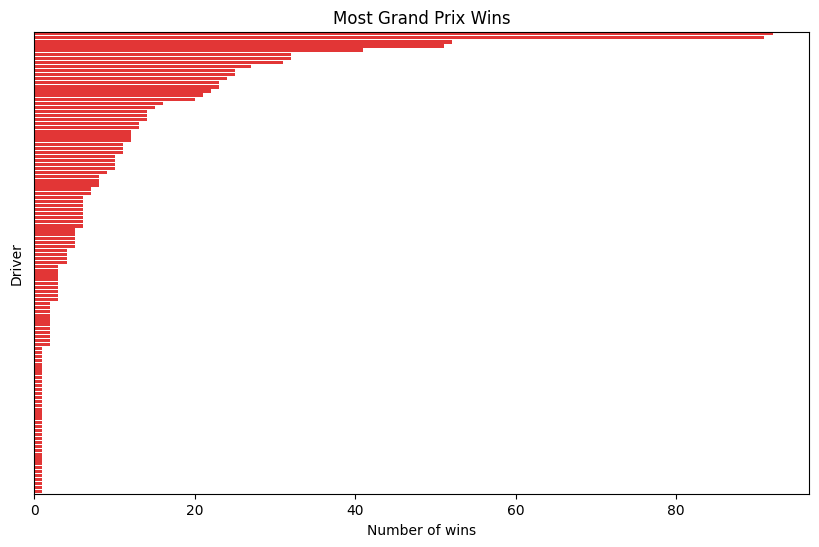

In [32]:
sb.barplot(data=driverWinner,y='driver',x='positionOrder',color='red',alpha=0.9)
plt.title('Most Grand Prix Wins')
plt.xlabel('Number of wins')
plt.ylabel('Driver')
plt.yticks([])

In [33]:
top10Drivers=driverWinner.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton             92
1  michael_schumacher             91
2              vettel             52
3               prost             51
4               senna             41
5              alonso             32
6      max_verstappen             32
7             mansell             31
8             stewart             27
9               clark             25


([<matplotlib.axis.XTick at 0x2054d4f52d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

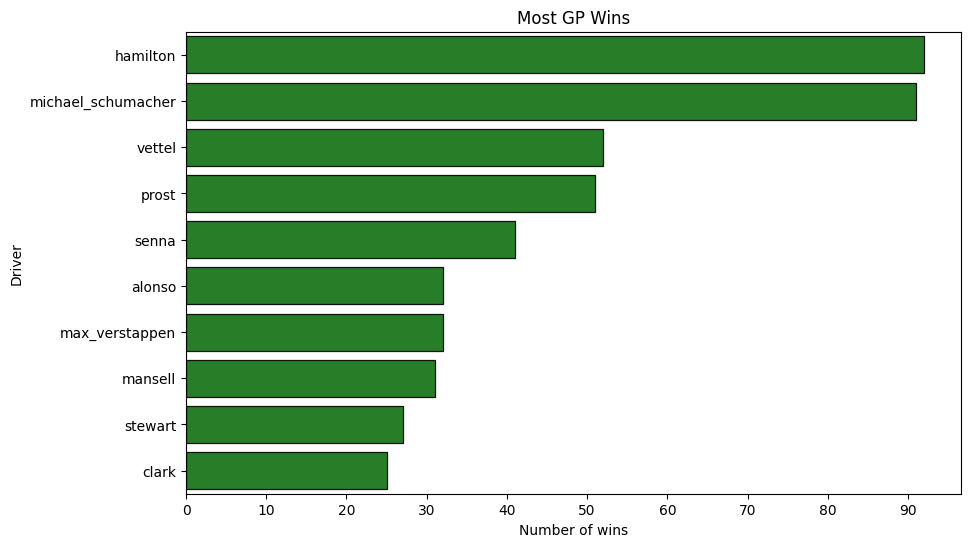

In [46]:
sb.barplot(data=top10Drivers,y='driver',x='positionOrder',color='green',alpha=0.9,linewidth=0.9,edgecolor='black')
plt.title('Most GP Wins')
plt.ylabel('Driver')
plt.xlabel('Number of wins')
plt.xticks(np.arange(0, 100, 10))

In [40]:
constructorWinner=df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

In [41]:
constructorWinner

,constructorName,positionOrder
0,Ferrari,240
1,McLaren,179
2,Williams,114
3,Mercedes,110
4,Red Bull,89
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


([], [])

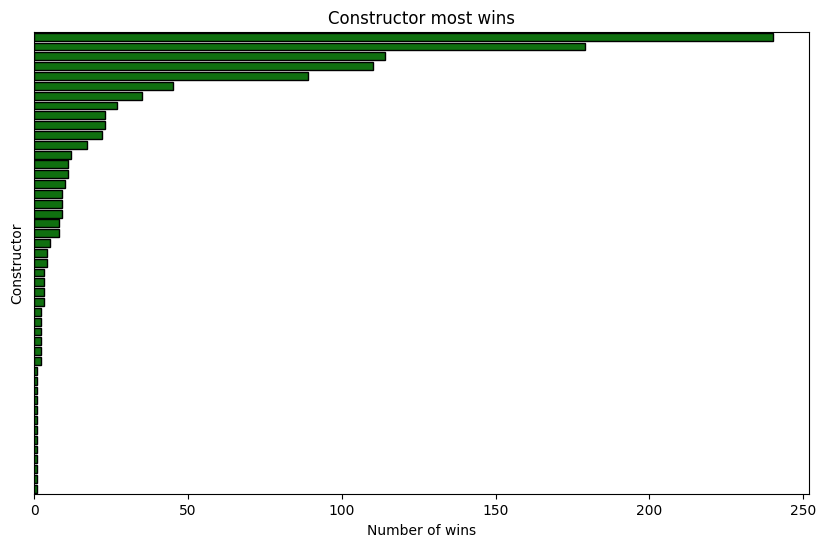

In [45]:
sb.barplot(data=constructorWinner,x='positionOrder',y='constructorName',color='green',edgecolor='black')
plt.title('Constructor most wins')
plt.xlabel('Number of wins')
plt.ylabel('Constructor')
plt.yticks([])

In [49]:
top10Constructors=constructorWinner.head(10)

In [51]:
top10Constructors

,constructorName,positionOrder
0,Ferrari,240
1,McLaren,179
2,Williams,114
3,Mercedes,110
4,Red Bull,89
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


([<matplotlib.axis.XTick at 0x2054d4ae990>,
 [Text(20, 0, '20'),
  Text(60, 0, '60'),
  Text(100, 0, '100'),
  Text(140, 0, '140'),
  Text(180, 0, '180'),
  Text(220, 0, '220')])

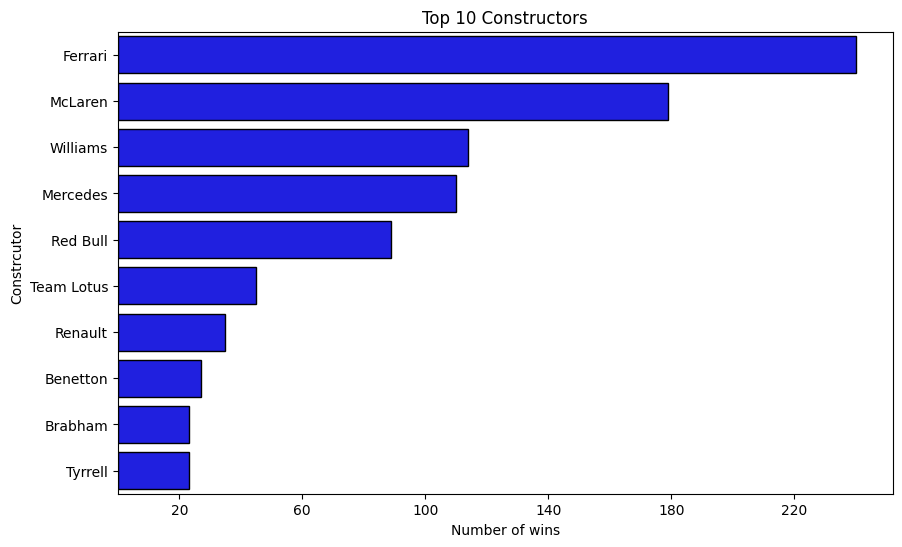

In [52]:
sb.barplot(data=top10Constructors,x='positionOrder',y='constructorName',color='blue',edgecolor='black')
plt.title('Top 10 Constructors')
plt.xlabel('Number of wins')
plt.ylabel('Constrcutor')
plt.xticks(np.arange(20,240,40))